#Installation
For the forthcoming lectures, we will require some of the libraries written in python in order to use common functionalities for any astronomical data.

If you are using Google Collab, these libraries are already installed.

For detailed installation process for astropy, check https://docs.astropy.org/en/stable/install.html

similarly for numpy, you can follow this page for installation assistance, https://numpy.org/install/

In [ ]:
#For computers using Pip
#!pip install astropy
#conda install astropy or conda update astropy

**Tip: to check if you have it installed or which version has been installed just open your command line and write 

```
pip list
```
in your command line.

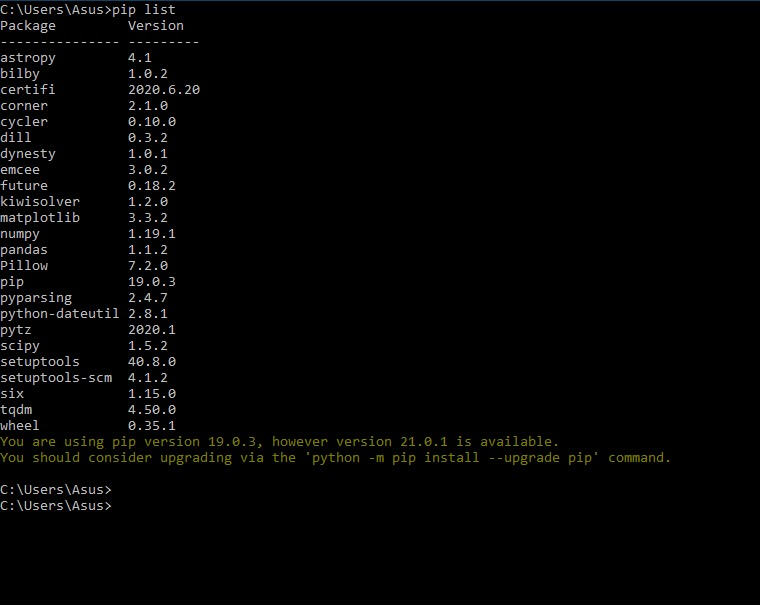

I will be mentioning and explaining different packages as we move forward

##Pulsar Data for plotting


We will be using Pulse data from European Pulsar Network to demonstrate how we can plot and visualise it using python. 

The EPN features 1079 pulsars in its catalogue and has 3347 profiles (many pulsars are observed by multiple telescopes.) It is currently maintained by [Jodrell Bank Centre for Astrophysics](http://www.jb.man.ac.uk/~pulsar/).

You can view database here: http://rian.kharkov.ua/decameter/EPN/browser.html

**Type of Data**:

The data provided by the database has various different formats available. It uses the custom made EPN data format for storage, but what makes it easy for is that, it also provides ASCII type data. 

##Data Fetching and reading

We would use the ASCII module of Astropy to read the data for a pulsar. Go [here](https://docs.astropy.org/en/stable/io/ascii/index.html) for complete list of functions from astropy.io.ascii

In [1]:
#Calls the astropy.io.ascii module
from astropy.io import ascii

ascii.read() enables us to read any kind of tabular data. It has algorithms to understand, basic text type document in multiple ways. Be it CSV files, basic tables, even html type table format.


read method can take various different kinds of parameters as source:
*  Name of a file (string)
*  Single string containing all table lines separated by newlines
*  File-like object with a callable read() method
*  List of strings where each list element is a table line




In [72]:
#Check delimeter='&' to see where it fails
#Using Pulsar data of J0006+1834 by Camilo, F. & Nice, D. J., 1995. Timing Parameters of 29 Pulsars. ApJ
url='http://rian.kharkov.ua/decameter/EPN/epndb/J0006+1834/cn95.epn.asc'
psr1 = ascii.read(url, names=('Time', 'Data'),data_start=2)
psr1.colnames

['Time', 'Data']

##Accessing the downloaded data.

In [73]:
psr1

Time,Data
float64,float64
0.00135497656,-0.0136168282
0.00270995311,0.000744573306
0.00406492967,0.00829873793
0.00541990623,-0.00871086493
0.00677488279,-0.00860901084
0.00812985934,-0.041202262
0.0094848359,-0.0649002716
0.0108398125,-0.0688046739
0.012194789,-0.00394070661


In [74]:
#It understands indexing like python
print(psr1[0])
print(psr1[-1])
print(psr1[0:3])

     Time          Data    
------------- -------------
0.00135497656 -0.0136168282
    Time         Data    
----------- -------------
0.693747997 -0.0354135633
     Time          Data     
------------- --------------
0.00135497656  -0.0136168282
0.00270995311 0.000744573306
0.00406492967  0.00829873793


In [75]:
#Try each columns
psr1['Data'][-1]

-0.0354135633

#Plotting

For plotting, python provides a lot of options, one which is widely used for visualising any kind of data is [matplotlib](https://matplotlib.org/stable/index.html)

Again, the installation process on any system is similar and Google has this installed too.

pyplot is a module of the package which provides us a way to use all other functions of matplotlib. 

In [4]:
import matplotlib.pyplot as plt     #plt is just a convention
%matplotlib inline      #To ensure the plotting is embedded in your notebook

A sample plotting

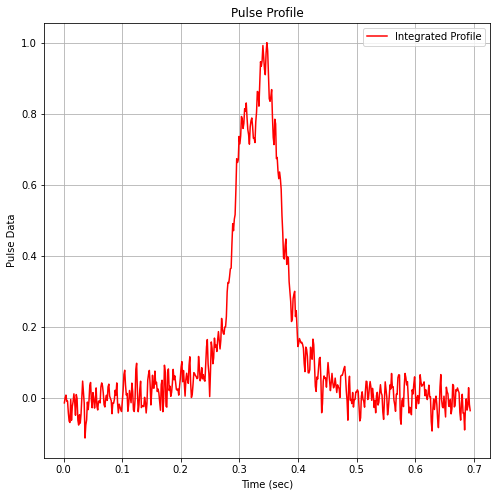

In [82]:
plt.figure(figsize=(8,8))
plt.grid()
plt.title("Pulse Profile")
plt.plot(psr1["Time"],psr1["Data"], 'r') # Plot Time vs Data
plt.xlabel("Time (sec)", fontsize=10)
plt.ylabel("Pulse Data", fontsize=10)
plt.legend(["Integrated Profile"])
plt.show()

#Plot for Pulsar B0011+47 at .408GHz

This is what Ascii Data for this pulsar looks like:

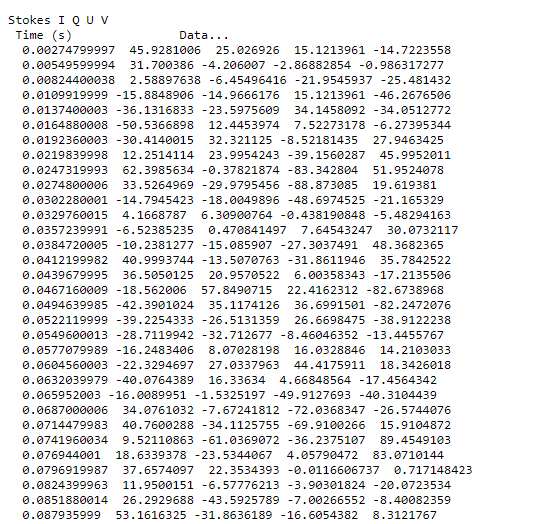

In [105]:
#Using pulsar data of B0011+47 by Gould, D. M. & Lyne, A.~G., 1998. Multifrequency polarimetry of 300 radio pulsars. MNRAS, 301, 235-260.
url='http://rian.kharkov.ua/decameter/EPN/epndb/B0011+47/gl98_408.epn.asc'
psr2 = ascii.read(url,names=('Time', 'I', 'Q','U','V'), data_start=2)
psr2.colnames

['Time', 'I', 'Q', 'U', 'V']

In [89]:
psr2

Time,I,Q,U,V
float64,float64,float64,float64,float64
0.00274799997,45.9281006,25.026926,15.1213961,-14.7223558
0.00549599994,31.700386,-4.206007,-2.86882854,-0.986317277
0.00824400038,2.58897638,-6.45496416,-21.9545937,-25.481432
0.0109919999,-15.8848906,-14.9666176,15.1213961,-46.2676506
0.0137400003,-36.1316833,-23.5975609,34.1458092,-34.0512772
0.0164880008,-50.5366898,12.4453974,7.52273178,-6.27395344
0.0192360003,-30.4140015,32.321125,-8.52181435,27.9463425
0.0219839998,12.2514114,23.9954243,-39.1560287,45.9952011
0.0247319993,62.3985634,-0.37821874,-83.342804,51.9524078


In [109]:
import numpy as np

In [115]:
linPol= np.sqrt(np.square(psr2['Q'])+np.square(psr2['U']))
type(linPol)

astropy.table.column.Column

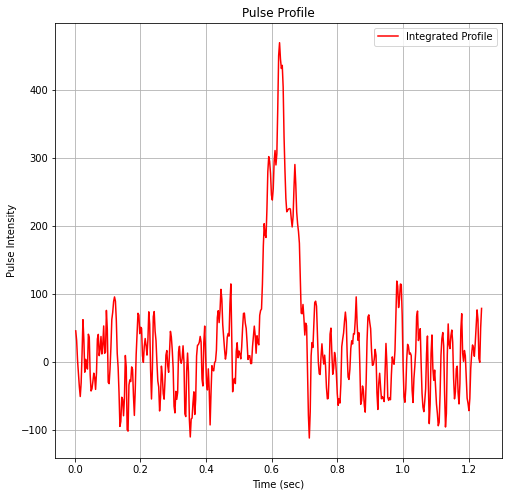

In [126]:
plt.figure(figsize=(8,8))
plt.grid()
plt.title("Pulse Profile")
plt.plot(psr2["Time"],psr2["I"], 'r') # Plot Time vs Data
plt.xlabel("Time (sec)", fontsize=10)
plt.ylabel("Pulse Intensity", fontsize=10)
plt.legend(["Integrated Profile"])
plt.show()

#Use of Sub Plots

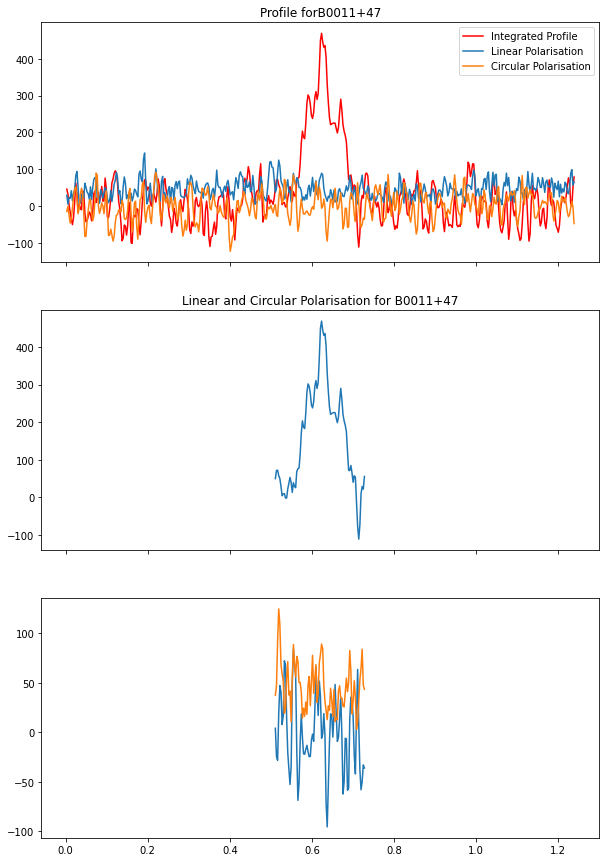

In [125]:
pulsar= 'B0011+47'
fig, ax = plt.subplots(3, figsize=(10,15), sharex=True)
ax[0].title.set_text('Profile for' + pulsar )
ax[0].plot(psr2['Time'], psr2['I'], color='r')
ax[0].plot(psr2['Time'], linPol)
ax[0].plot(psr2['Time'], psr2['V'])
ax[0].legend(["Integrated Profile", "Linear Polarisation", "Circular Polarisation"])
#plotting Linear and Circular Polarisation
ax[1].title.set_text('Linear and Circular Polarisation for '+pulsar)
ax[1].plot(psr2['Time'][185:265], psr2['I'][185:265])
ax[2].plot(psr2['Time'][185:265], psr2['V'][185:265])
ax[2].plot(psr2['Time'][185:265], linPol[185:265])

Checking if what we have plotted compared to original plot in the [research article](https://http://adsabs.harvard.edu/cgi-bin/nph-bib_query?bibcode=1998MNRAS.301..235)

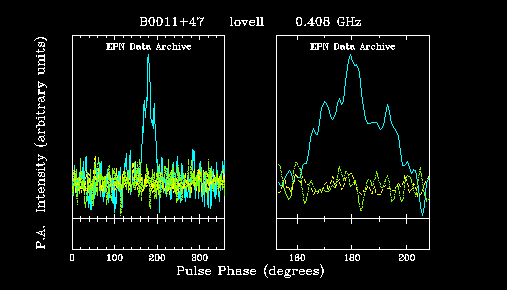